<a href="https://colab.research.google.com/github/sylwia-krzysz/udemy-ML/blob/main/supervised/03_classification/KURS_ML_04_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### scikit-learn
Strona biblioteki: [https://scikit-learn.org](https://scikit-learn.org)  

Dokumentacja/User Guide: [https://scikit-learn.org/stable/user_guide.html](https://scikit-learn.org/stable/user_guide.html)

Podstawowa biblioteka do uczenia maszynowego w języku Python.

Aby zainstalować bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install scikit-learn
```
Aby zaktualizować do najnowszej wersji bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install --upgrade scikit-learn
```
Kurs stworzony w oparciu o wersję `0.22.1`


### Spis treści:
1. [Import bibliotek](#1)
2. [Załadowanie danych](#2)
3. [Eksploracja danych](#3)
4. [Przygotowanie danych do modelu](#4)
5. [Budowa klasyfikatora drzewa decyzyjnego](#5)
6. [Graf drzewa decyzyjnego](#6)
7. [Budowa funkcji dla modelu drzewa decyzyjnego](#7)

### <a name='1'></a> Import bibliotek

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from IPython.display import Image

sns.set(font_scale=1.3)
np.random.seed(42)
sns.set_style("darkgrid")

### <a name='2'></a> Załadowanie danych

In [2]:
raw_data = load_iris()
all_data = raw_data.copy()

data = all_data['data']
target = all_data['target']
feature_names = [name.replace(' ', '_')[:-5] for name in all_data['feature_names']]
target_names = all_data['target_names']

print(f'Liczba próbek: {len(data)}')
print(f'Kształt danych: {data.shape}')
print(f'Nazwy zmiennych objaśniających: {feature_names}')
print(f'Nazwy kategorii kosaćca: {target_names}')

Liczba próbek: 150
Kształt danych: (150, 4)
Nazwy zmiennych objaśniających: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Nazwy kategorii kosaćca: ['setosa' 'versicolor' 'virginica']


### <a name='3'></a> Eksploracja danych
Iris Setosa

In [ ]:
Image(url='https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/decision_tree_course/graphs/Iris_setosa.jpg', width=200)

Iris Versicolor

In [ ]:
Image(url='https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/decision_tree_course/graphs/Iris_versicolor.jpg', width=200)

Iris Virginica

In [ ]:
Image(url='https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/decision_tree_course/graphs/Iris_virginica.jpg', width=200)

In [3]:
df = pd.DataFrame(data=np.c_[data, target], columns=feature_names + ['target'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


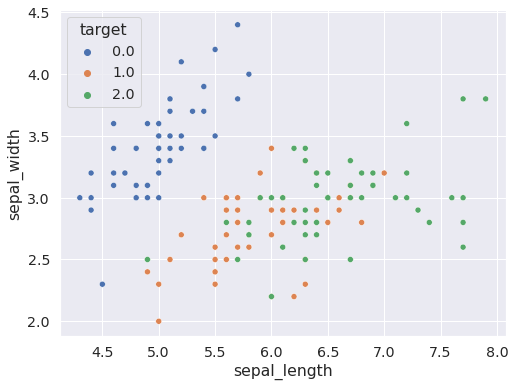

In [6]:
plt.figure(figsize=(8, 6))
_ = sns.scatterplot('sepal_length', 'sepal_width', hue='target', data=df, legend='full', palette=sns.color_palette()[:3])

In [7]:
df['target'].value_counts()

2.0    50
1.0    50
0.0    50
Name: target, dtype: int64

### <a name='4'></a> Przygotowanie danych do modelu

In [8]:
data = df.copy()
data = data[['sepal_length', 'sepal_width', 'target']]
target = data.pop('target')

data.head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [ ]:
target.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

In [10]:
####same dane bez nazw kolumn
data = data.values
target = target.values.astype('int16')

### <a name='5'></a> Budowa klasyfikatora drzewa decyzyjnego
- max_depth=1


In [11]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth=1, random_state=42)
classifier.fit(data, target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

Wykreślenie granic decyzyjnych

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


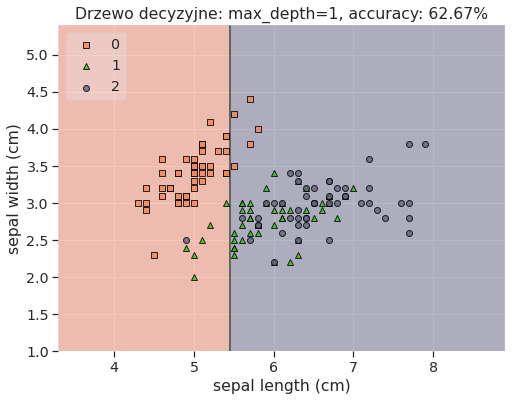

In [12]:
from mlxtend.plotting import plot_decision_regions

colors='#f1865b,#31c30f,#64647F,#d62728,#9467bd,#8c564b,#e377c2,#7f7f7f,#bcbd22,#17becf'

acc = classifier.score(data, target)

plt.figure(figsize=(8, 6))
plot_decision_regions(data, target, classifier, legend=2, colors=colors)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title(f'Drzewo decyzyjne: max_depth=1, accuracy: {acc * 100:.2f}%')
plt.show()

### <a name='6'></a>  Graf drzewa decyzyjnego
- max_depth = 1

Wyświetlenie grafu drzewa decyzyjnego

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


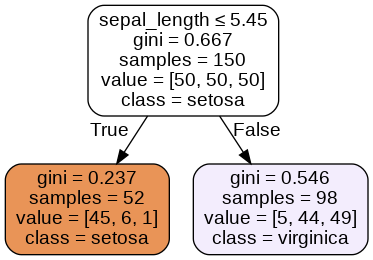

In [13]:
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(classifier,
               out_file=dot_data,
               feature_names=feature_names[:2],
               class_names=target_names,
               special_characters=True,
               rounded=True,
               filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('graph.png')
Image(graph.create_png(), width=300)

### <a name='7'></a> Budowa funkcji dla modelu drzewa decyzyjnego

In [14]:
def make_decision_tree(max_depth=1):
    # trenowanie modelu
    classifier = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    classifier.fit(data, target)

    # eksport grafu drzewa
    dot_data = StringIO()
    export_graphviz(classifier,
                   out_file=dot_data,
                   feature_names=feature_names[:2],
                   class_names=target_names,
                   special_characters=True,
                   rounded=True,
                   filled=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    graph.write_png('graph.png')
    
    # obliczenie dokładności
    acc = classifier.score(data, target) 

    # wykreślenie granic decyzyjnych
    colors='#f1865b,#31c30f,#64647F,#d62728,#9467bd,#8c564b,#e377c2,#7f7f7f,#bcbd22,#17becf'
    plt.figure(figsize=(8, 6))
    ax = plot_decision_regions(data, target, classifier, legend=0, colors=colors)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, ['setosa', 'versicolor', 'virginica'], framealpha=0.3)
    plt.xlabel('sepal length (cm)')
    plt.ylabel('sepal width (cm)')
    plt.title(f'Drzewo decyzyjne: max_depth={max_depth}, accuracy={acc * 100:.2f}')
    
    return Image(graph.create_png(), width=200 + max_depth * 120)


- max_depth=2


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


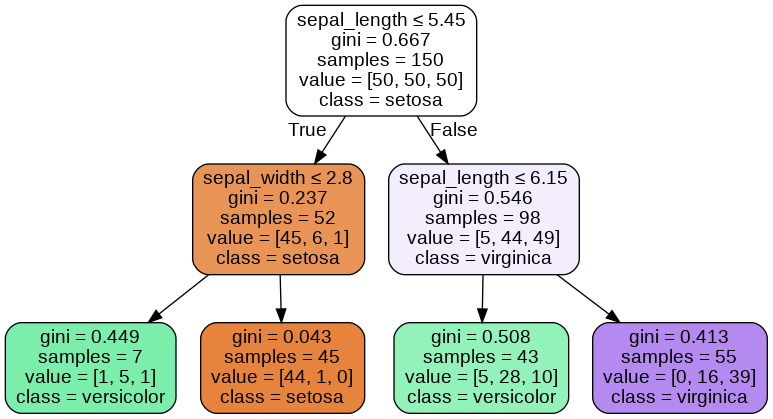

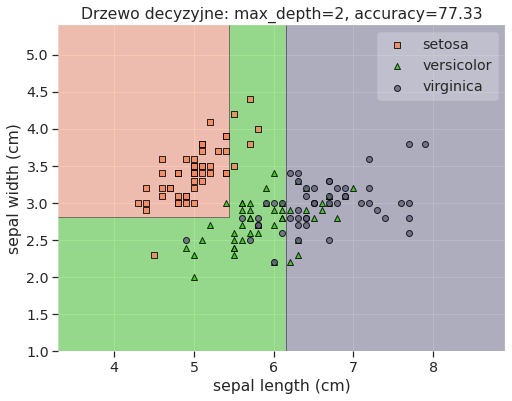

In [15]:
make_decision_tree(max_depth=2)

- max_depth=3

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


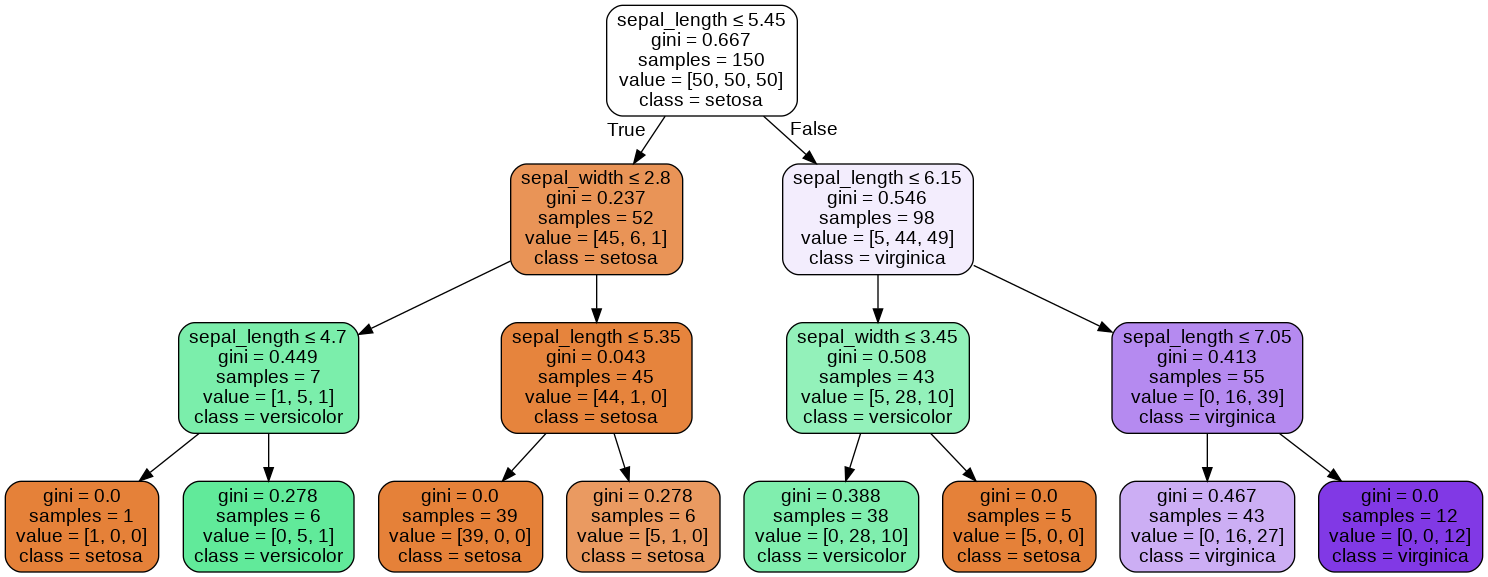

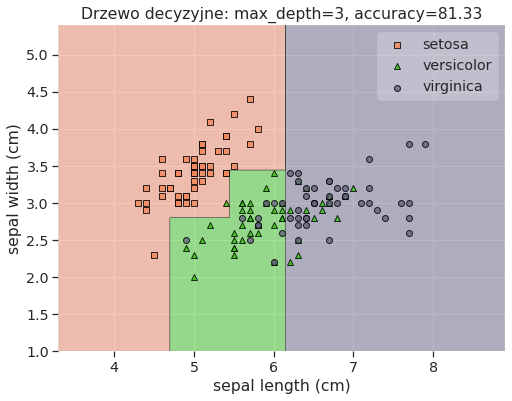

In [16]:
make_decision_tree(max_depth=3)

- max_depth=4

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


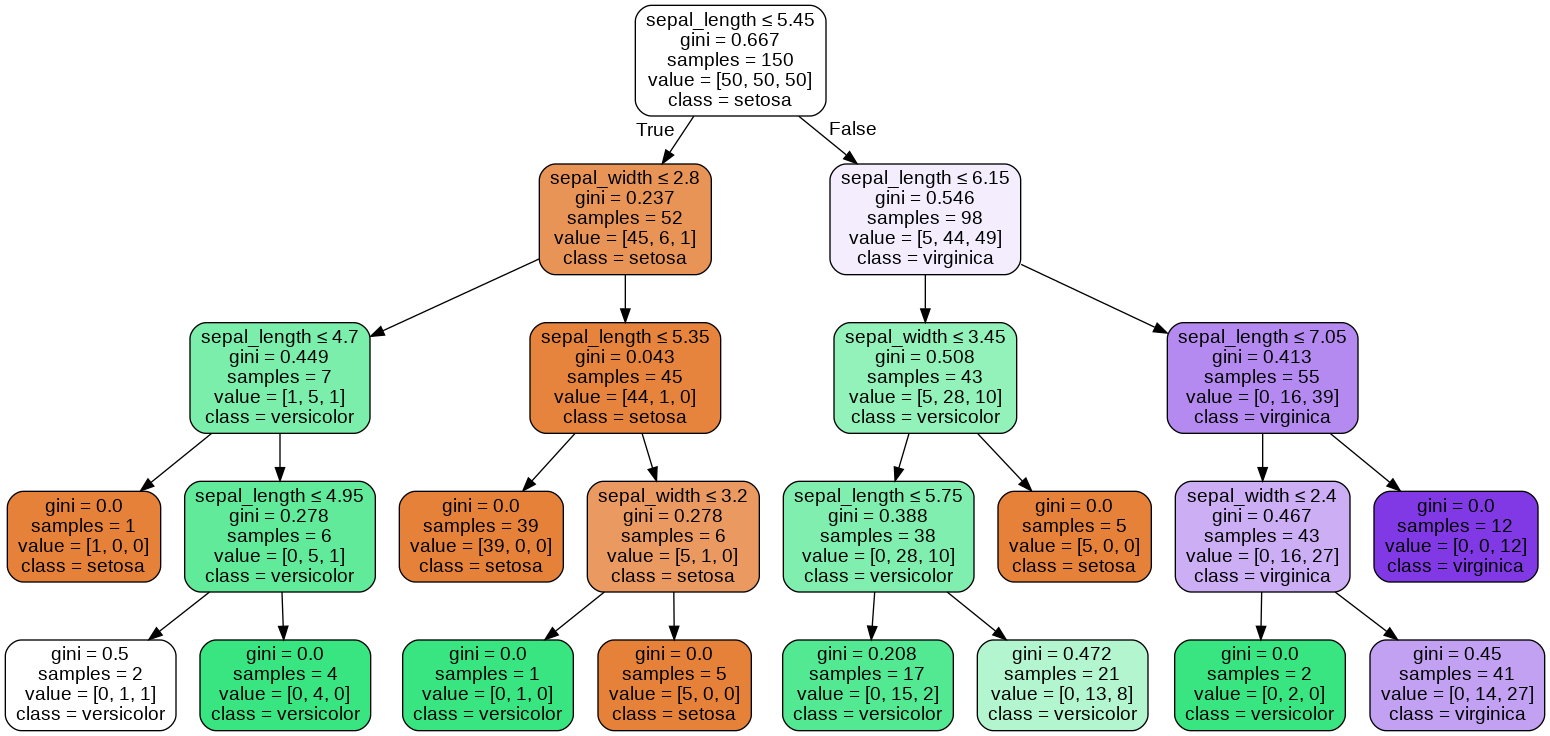

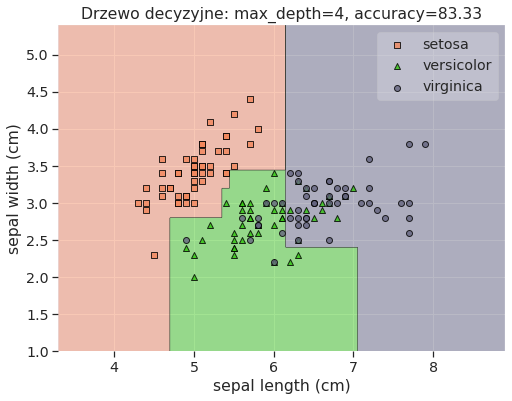

In [17]:
make_decision_tree(max_depth=4)

- max_depth=5

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


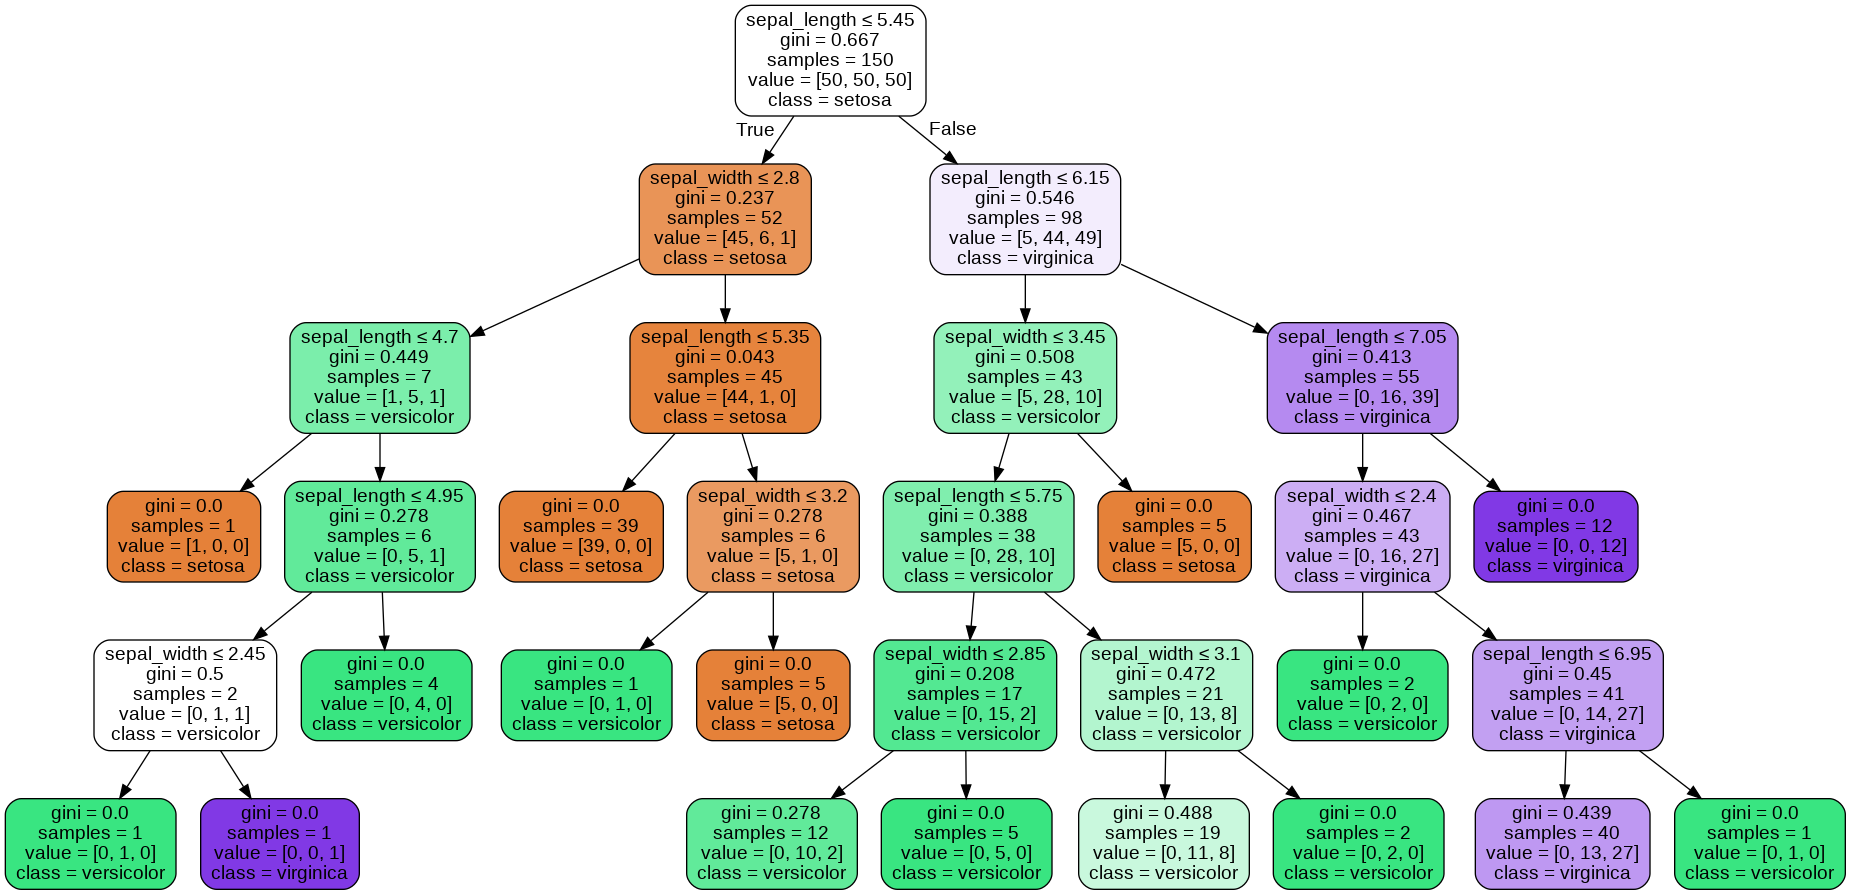

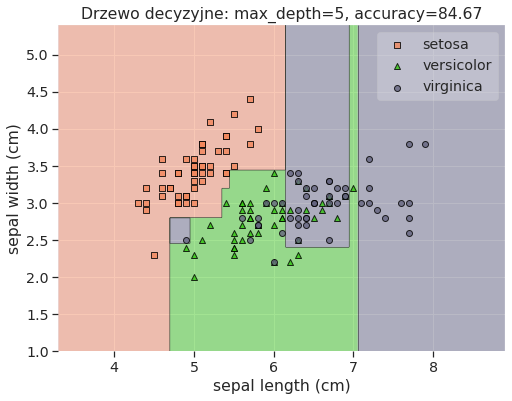

In [18]:
make_decision_tree(max_depth=5)

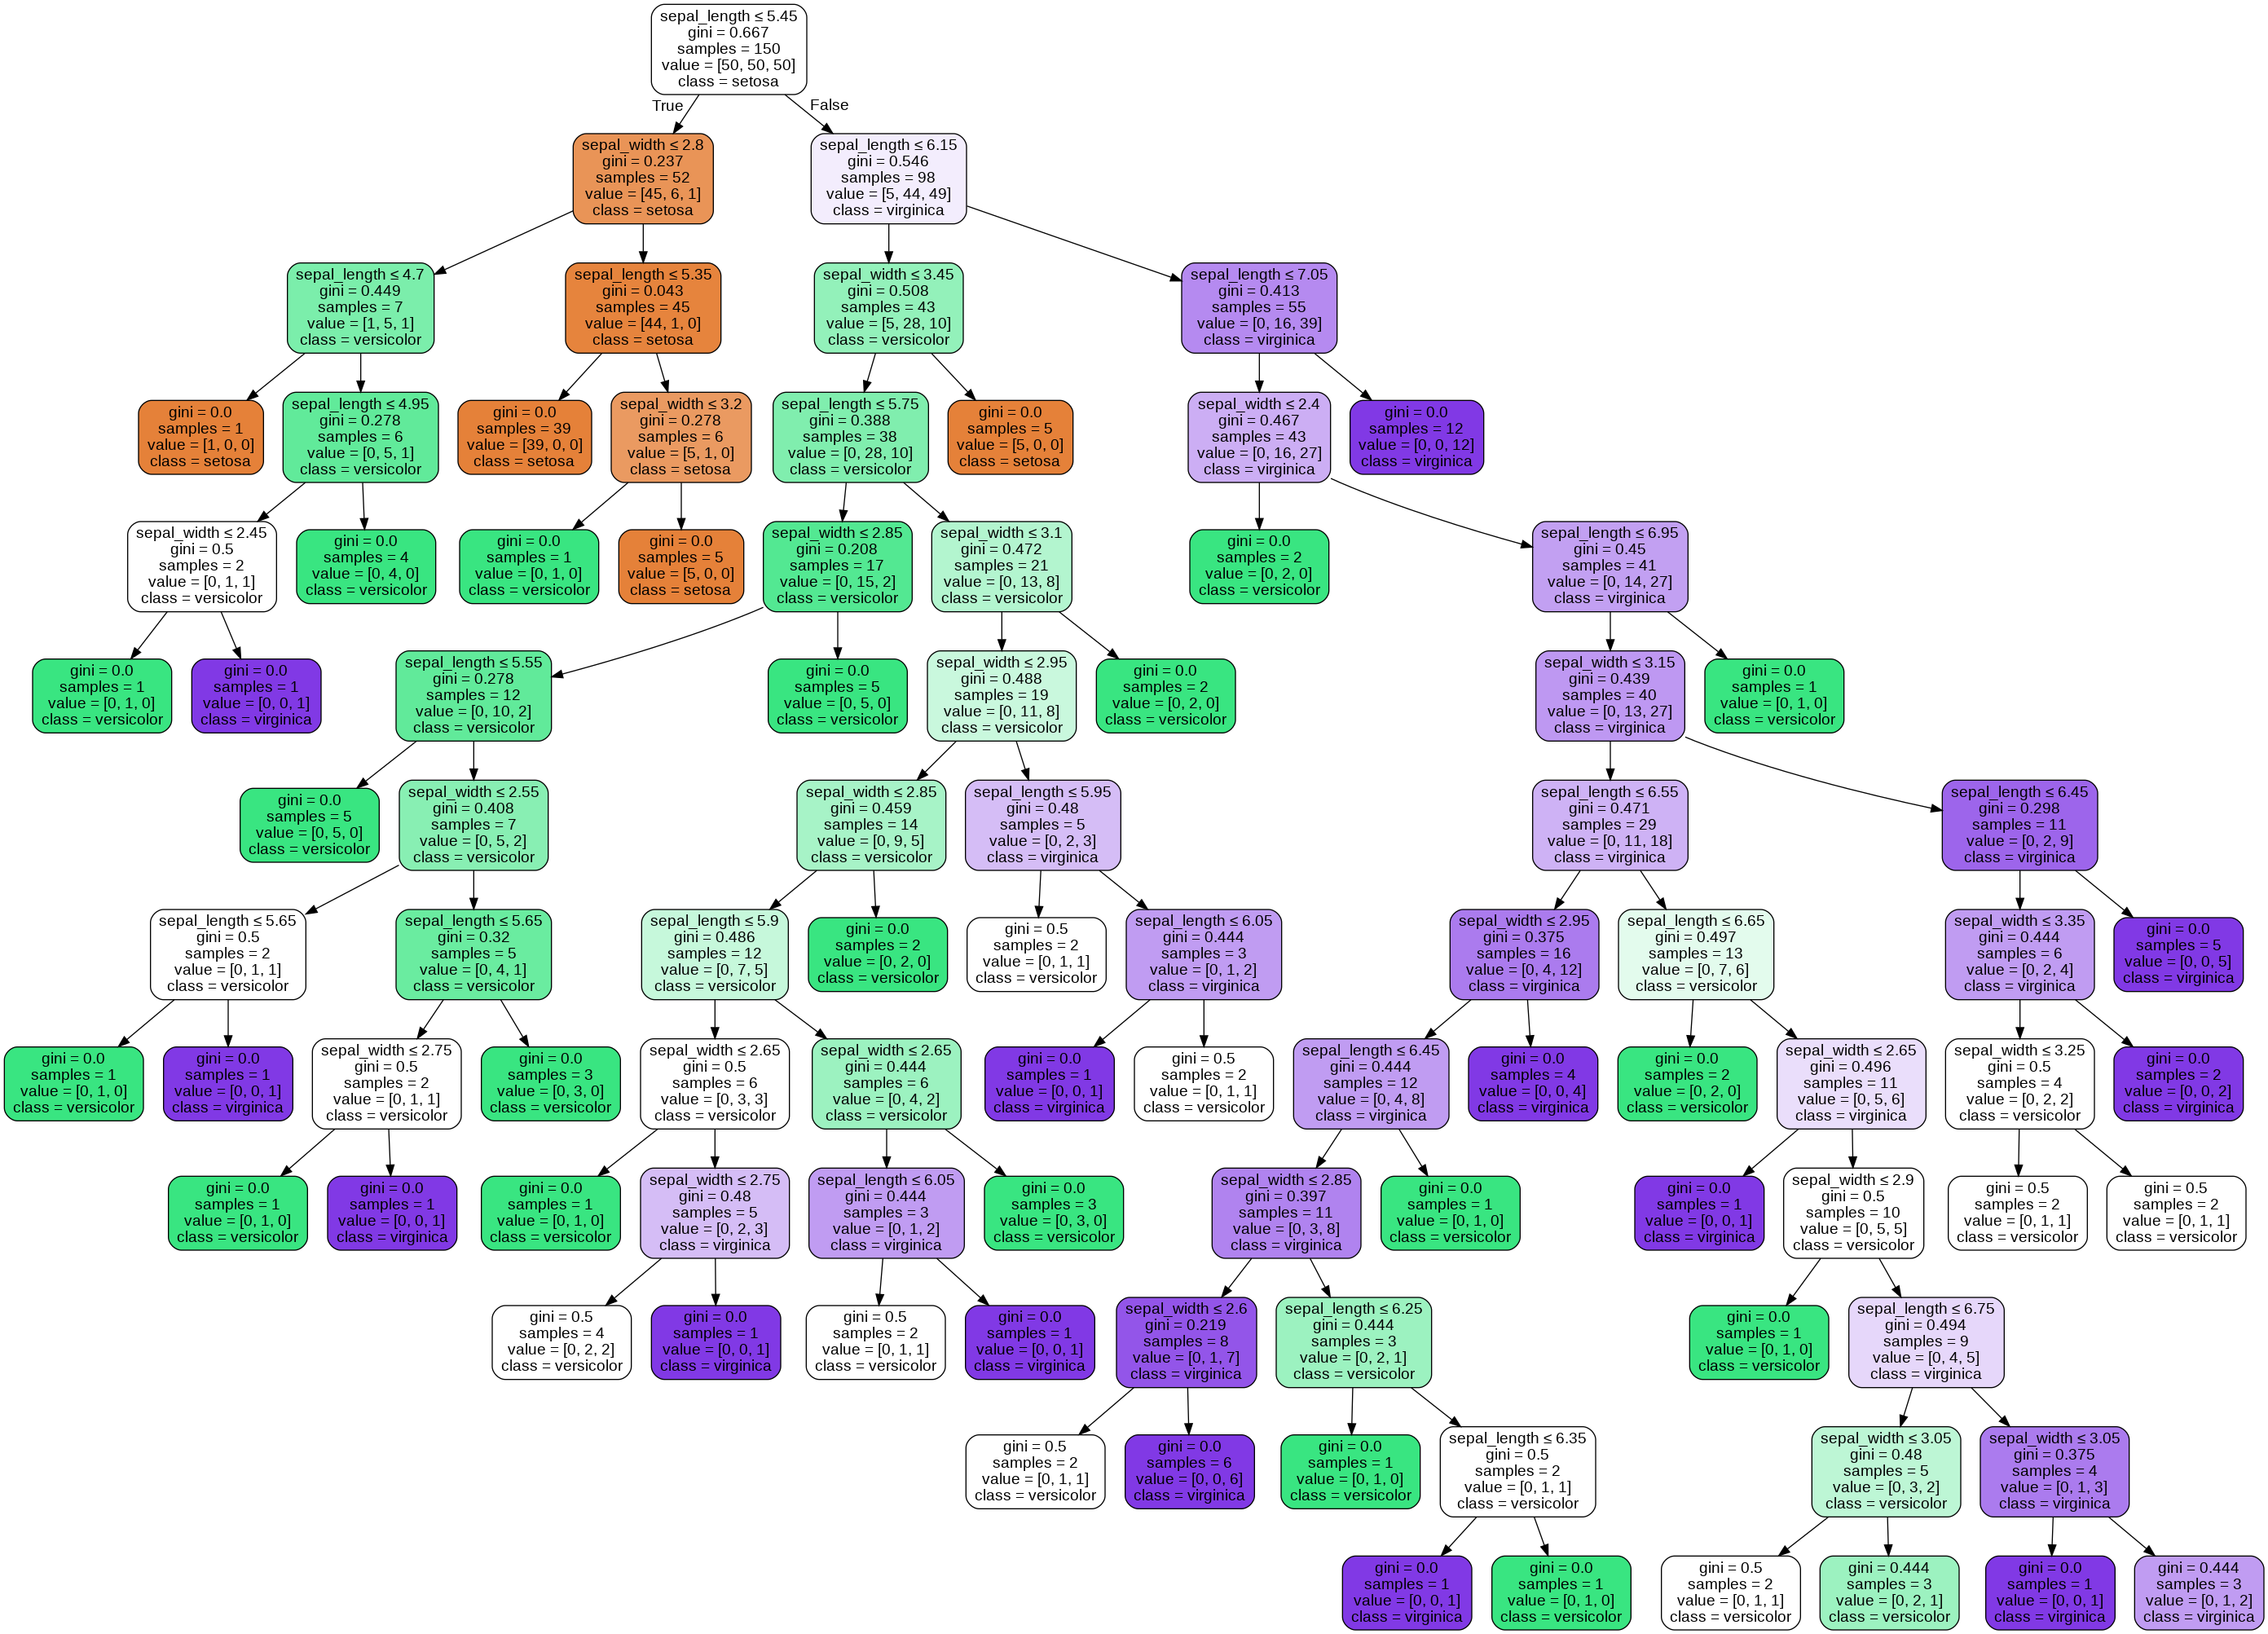

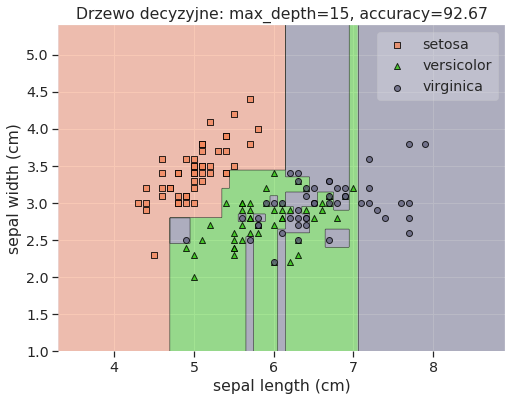

In [ ]:
make_decision_tree(max_depth=15)